In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits import mplot3d

#  Lab Assignment 9
### - Jaskirat Singh Maskeen (23110146)

### Loading the dataset

In [ ]:
df = sns.load_dataset(name='iris')
species = list(df['species'].unique())
attributes = df.columns[:-1]


### Standardising the data

$$
X_{i}^{'} = \frac{X_{i} - \bar{X}}{\sqrt{var(X)}}
$$
where X is the column

In [ ]:
for col in attributes:
  c = df[col]
  Ec = np.mean(c)
  Vc = np.sum((c-Ec)**2)/(len(c)-1)
  df[col] = (c-Ec)/np.sqrt(Vc)

ddf = df[attributes]
dfc = ddf.to_numpy()

### Q1. Estimate the covariance matrix of the 4 attributes.

For 4 random variables, the covariance matrix is written as,
$$
C_{\mathbb{X}} = E_{\mathbb{X}}[(\mathbb{X}-\mu)_{4\times1}(\mathbb{X}-\mu)^T_{1\times4}]
$$
Where,
$\mu = E_{\mathbb{X}}[\mathbb{X}]$<br>

Observe $(\mathbb{X}-\mu)_{4\times1}(\mathbb{X}-\mu)^T_{1\times4}$ <br>
<table>
<tr><td>
<table>
<tr>
<td>$X_{1} - \mu_{1}$</td>
</tr>
<tr>
<td>$X_{2} - \mu_{2}$</td>
</tr>
<tr>
<td>$X_{3} - \mu_{3}$</td>
</tr>
<tr>
<td>$X_{4} - \mu_{4}$</td>
</tr>
</table>
</td>
<td>$[\:X_{1} - \mu_{1}\:X_{2} - \mu_{2}\:X_{3} - \mu_{3}\:X_{4} - \mu_{4}\:]$</td>
</tr>
</table>
<br>
Upon solving for $C_{\mathbb{X}}$, we get the covariance matrix.


In [ ]:
def cov_corcoef(c1,c2):
  n = len(c1)
  m1 = np.mean(c1)
  v1 = np.sum((c1-m1)**2)/(n-1)
  m2 = np.mean(c2)
  v2 = np.sum((c2-m2)**2)/(n-1)
  cov = np.dot((c1-m1),(c2-m2))/(n-1)
  corcoef = cov/np.sqrt(v1*v2)
  return cov,corcoef

cov_matrix = np.zeros((len(attributes),len(attributes)))
for i in range(len(attributes)):
  for j in range(len(attributes)):
    cov_matrix[i,j] = cov_corcoef(df[attributes[i]],df[attributes[j]])[0]
print(list(attributes))
print()
print(cov_matrix)


['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


### Q2. Estimate the four principal components of the data.

To get the principal components, diagonalise the matrix and sort the eigen vectors based on eigen values.<br><br>

Then we take the top k columns to get the k principal components.

In [ ]:
eigen_values,eigen_vectors = np.linalg.eig(cov_matrix)
ls = []
for i in range(len(eigen_values)):
  ls.append((eigen_values[i],eigen_vectors[i]))
ls.sort(key=lambda x:x[0],reverse = True)
eigen_values,eigen_vectors = [i[0] for i in ls],np.array([i[1] for i in ls])
percentage_variance = np.array([round(i*100/sum(eigen_values),5) for i in eigen_values]) # percentage of observed variance
print('Eigen Values')
print(eigen_values)
print()
print('Eigen Vectors')
print(eigen_vectors)

Eigen Values
[2.9184978165319952, 0.9140304714680699, 0.14675687557131575, 0.02071483642861951]

Eigen Vectors
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


### Q3. Perform dimensionality reduction using PCA to reduce 150 data points into two dimensions and three dimensions.

#### a) Three dimenstions

In [ ]:
top_3_evals = eigen_values[:3]
top_3_evec = eigen_vectors[:,:3]

top_3_pervar = percentage_variance[:3]

reduced_to_three = np.matmul(dfc,top_3_evec)
print(reduced_to_three)

[[-2.25714118 -0.47842383 -0.12727962]
 [-2.07401302  0.67188269 -0.23382552]
 [-2.35633511  0.34076642  0.0440539 ]
 [-2.29170679  0.59539986  0.0909853 ]
 [-2.3818627  -0.64467566  0.01568565]
 [-2.06870061 -1.4842053   0.02687825]
 [-2.43586845 -0.04748512  0.3343503 ]
 [-2.22539189 -0.222403   -0.08839935]
 [-2.32684533  1.1116037   0.14459247]
 [-2.17703491  0.46744757 -0.25291827]
 [-2.15907699 -1.04020587 -0.267784  ]
 [-2.31836413 -0.132634    0.09344619]
 [-2.2110437   0.72624318 -0.23014025]
 [-2.62430902  0.95829635  0.18019242]
 [-2.19139921 -1.85384655 -0.47132203]
 [-2.25466121 -2.67731523  0.03042468]
 [-2.20021676 -1.47865573 -0.00532625]
 [-2.18303613 -0.48720613 -0.04406769]
 [-1.89223284 -1.40032757 -0.37309338]
 [-2.33554476 -1.1240836   0.13218763]
 [-1.90793125 -0.40749058 -0.41988594]
 [-2.19964383 -0.92103587  0.1593315 ]
 [-2.76508142 -0.4568133   0.33106998]
 [-1.81259716 -0.08527285  0.03437344]
 [-2.21972701 -0.13679618  0.11759957]
 [-1.9453293   0.62352971

#### b) Two dimensions

In [ ]:
top_2_evals = eigen_values[:2]
top_2_evec = eigen_vectors[:,:2]
top_2_pervar = percentage_variance[:2]

reduced_to_two = np.matmul(dfc,top_2_evec)
print(reduced_to_two)

[[-2.25714118 -0.47842383]
 [-2.07401302  0.67188269]
 [-2.35633511  0.34076642]
 [-2.29170679  0.59539986]
 [-2.3818627  -0.64467566]
 [-2.06870061 -1.4842053 ]
 [-2.43586845 -0.04748512]
 [-2.22539189 -0.222403  ]
 [-2.32684533  1.1116037 ]
 [-2.17703491  0.46744757]
 [-2.15907699 -1.04020587]
 [-2.31836413 -0.132634  ]
 [-2.2110437   0.72624318]
 [-2.62430902  0.95829635]
 [-2.19139921 -1.85384655]
 [-2.25466121 -2.67731523]
 [-2.20021676 -1.47865573]
 [-2.18303613 -0.48720613]
 [-1.89223284 -1.40032757]
 [-2.33554476 -1.1240836 ]
 [-1.90793125 -0.40749058]
 [-2.19964383 -0.92103587]
 [-2.76508142 -0.4568133 ]
 [-1.81259716 -0.08527285]
 [-2.21972701 -0.13679618]
 [-1.9453293   0.62352971]
 [-2.04430277 -0.24135499]
 [-2.1613365  -0.52538942]
 [-2.13241965 -0.312172  ]
 [-2.25769799  0.33660425]
 [-2.13297647  0.50285608]
 [-1.82547925 -0.42228039]
 [-2.60621687 -1.78758727]
 [-2.43800983 -2.1435468 ]
 [-2.10292986  0.45866527]
 [-2.20043723  0.20541922]
 [-2.03831765 -0.65934923]
 

### Q4. Visualize the reduced dimension 150 data points in 2D and 3D while giving different colors to reduced data points of diff different species.

#### a) 3D plot

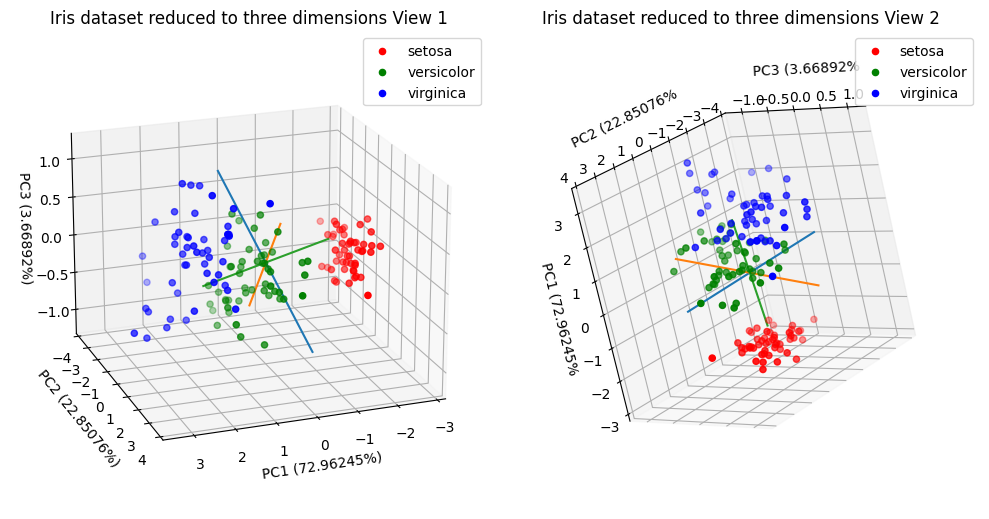

The percentage shown on the axes the the percentage of variance within that dataset along that axis


In [ ]:
d1,d2,d3 = reduced_to_three[:50],reduced_to_three[50:100],reduced_to_three[100:150]
d1,d2,d3 = d1.transpose(),d2.transpose(),d3.transpose()
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
v1,v2,v3 = top_3_evec.transpose()
t = np.linspace(-2,2,1000)
tg = np.linspace(-4,4,1000)
ax.plot(v1[0]*t,v1[1]*t,v1[2]*t)
ax.plot(v2[0]*tg,v2[1]*tg,v2[2]*tg)
ax.plot(v3[0]*t,v3[1]*t,v3[2]*t)
ax.set_xlabel(f'PC1 ({top_3_pervar[0]}%)')
ax.set_ylabel(f'PC2 ({top_3_pervar[1]}%)')
ax.set_zlabel(f'PC3 ({top_3_pervar[2]}%)')
plt.tight_layout()
ax.set_box_aspect(aspect=None, zoom=0.95)
ax.view_init(azim=70, elev=20,roll=0) #(rotate x rotate y rotate z)
ax.scatter3D(*d1,color='r',label='setosa')
ax.scatter3D(*d2,color='g',label='versicolor')
ax.scatter3D(*d3,color='b',label='virginica')
ax.legend()
plt.title("Iris dataset reduced to three dimensions View 1")

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
ax.plot(v1[0]*t,v1[1]*t,v1[2]*t)
ax.plot(v2[0]*tg,v2[1]*tg,v2[2]*tg)
ax.plot(v3[0]*t,v3[1]*t,v3[2]*t)
ax.set_xlabel(f'PC1 ({top_3_pervar[0]}%')
ax.set_ylabel(f'PC2 ({top_3_pervar[1]}%')
ax.set_zlabel(f'PC3 ({top_3_pervar[2]}%')
plt.tight_layout()
ax.set_box_aspect(aspect=None, zoom=0.8)
ax.view_init(azim=70, elev=40,roll=-90) #(rotate x rotate y rotate z)
ax.scatter3D(*d1,color='r',label='setosa')
ax.scatter3D(*d2,color='g',label='versicolor')
ax.scatter3D(*d3,color='b',label='virginica')
ax.legend()
plt.title("Iris dataset reduced to three dimensions View 2")
plt.show()
print('The percentage shown on the axes the the percentage of variance within that dataset along that axis')

#### b) 2D plot

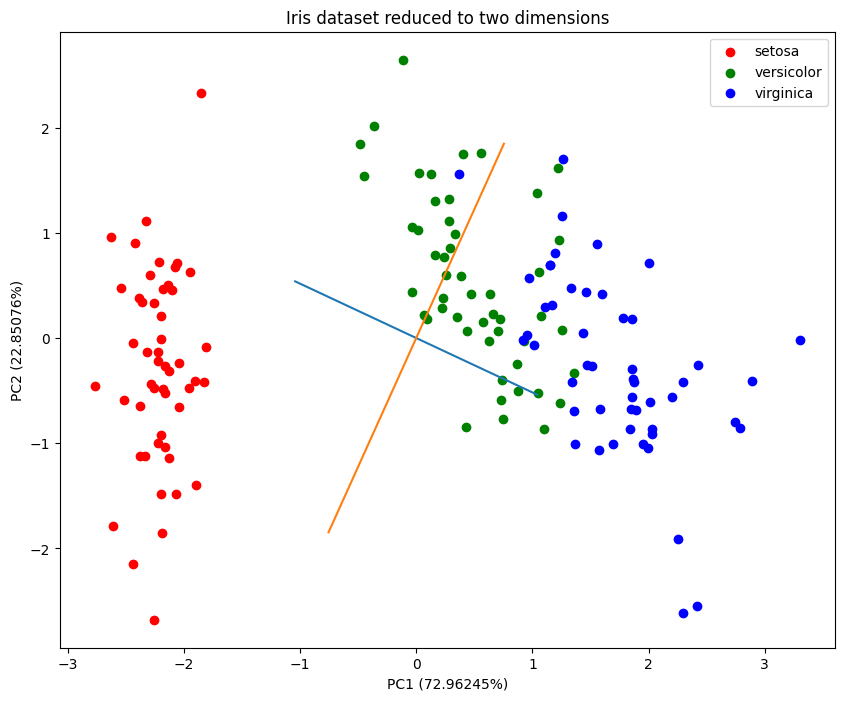

The percentage shown on the axes the the percentage of variance within that dataset along that axis


In [ ]:
data = reduced_to_two.transpose()
d1,d2,d3 = reduced_to_two[:50],reduced_to_two[50:100],reduced_to_two[100:150]
d1,d2,d3 = d1.transpose(),d2.transpose(),d3.transpose()

v1,v2 = top_2_evec.transpose()
t = np.linspace(-2,2,1000)
plt.figure(figsize=(10,8))
plt.scatter(*d1,color='r',label='setosa')
plt.scatter(*d2,color='g',label='versicolor')
plt.scatter(*d3,color='b',label='virginica')
plt.plot(v1[0]*t,v1[1]*t)
plt.plot(v2[0]*t,v2[1]*t)
plt.xlabel(f'PC1 ({top_2_pervar[0]}%)')
plt.title("Iris dataset reduced to two dimensions")
plt.ylabel(f'PC2 ({top_2_pervar[1]}%)')
plt.legend()
plt.show()
print('The percentage shown on the axes the the percentage of variance within that dataset along that axis')


### References:
https://www.reddit.com/r/statistics/comments/k2tque/q_how_to_label_axes_when_projecting_data_into/